In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.3.1'

# 数据准备

In [4]:
#读取模型
fashion_mnist = tf.keras.datasets.fashion_mnist
# help(fashion_mnist.load_data)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # 下载后的数据集放在 ~/.keras/datasets

In [5]:
#获得图片大小
train_images.shape

(60000, 28, 28)

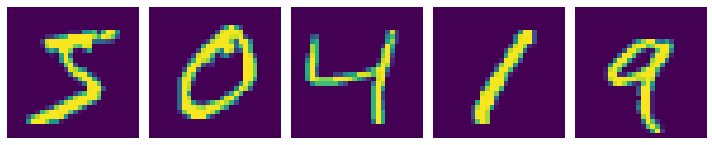

In [6]:
#打印图例
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(train_images[:10])

In [7]:
#归一化
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
train_images.shape

(60000, 28, 28)

# 开始模型操作

In [32]:
#全链接层模型
# see: https://blog.csdn.net/weixin_42483560/article/details/84951612
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', use_bias=False, trainable=False), #全连接层
    tf.keras.layers.Dense(10, activation='softmax')
])
#模型总结
model.summary()
#编译 要先这一步才能进行训练
model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy', #categorical_crossentropy->[1,0,0,0,0]
      metrics=['accuracy']) 
      
#训练
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,642
Trainable params: 1,290
Non-trainable params: 100,352
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.9983 - accuracy: 0.7577 - val_loss: 0.6063 - val_accuracy: 0.8397
Epoch 2/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.5571 - accuracy: 0.8478 - val_loss: 0.4867 - val_accuracy: 0.8593
Epoch 3/10
1875/1875 [==============================] - 1s 670us/step - loss: 0.4796

In [33]:
#模型权重
model.variables

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.02997167,  0.01067434, -0.06321626, ..., -0.0218691 ,
         -0.03136409,  0.07608006],
        [ 0.07777431, -0.06751747,  0.00930348, ..., -0.02662834,
          0.03385767, -0.07503352],
        [ 0.06498899,  0.06744405, -0.00157072, ..., -0.04843459,
          0.07320272, -0.06790884],
        ...,
        [-0.07329933,  0.00676517, -0.01012445, ..., -0.04616012,
          0.02187999, -0.0672981 ],
        [ 0.07224391, -0.08051819,  0.00165532, ...,  0.03741685,
         -0.05376539, -0.05330751],
        [-0.0607429 ,  0.00741481, -0.02320548, ...,  0.06338764,
         -0.06856947, -0.06819692]], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 10) dtype=float32, numpy=
 array([[-1.8142213e+00,  4.2992854e-01,  1.2543461e+00, ...,
          3.8683903e-01, -5.3497076e-01, -4.3163979e-01],
        [ 1.1057474e-01,  1.1619552e+00, -1.0981963e+00, ...,
         -1.4094307e-01, -1.871906

In [34]:
# 保存权重
model.save_weights('./fashion_mnist/my_checkpoint')

In [ ]:
# 恢复权重
model.load_weights('./fashion_mnist/my_checkpoint')
# model1.load_weights('./fashion_mnist/my_checkpoint') 

In [35]:
# 预测
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 - 0s - loss: 0.3700 - accuracy: 0.8916
Restored model, accuracy: 89.16%


In [ ]:
#保存整个模型
model.save('my_model.h5')
new_model = tf.keras.models.load_model('my_model.h5')
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [41]:
# 在文件名中包含 epoch (使用 `str.format`)
checkpoint_path = "fashion_mnist_1/cp-{epoch:04d}.ckpt"

# 创建一个回调，每个epoch保存模型的权重
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    save_weights_only=True,
    period=1) #save_freq = ‘epoch'/n samples 60000 100 600

# 使用 `checkpoint_path` 格式保存权重
model.save_weights(checkpoint_path.format(epoch=1))

In [42]:
# 使用新的回调训练模型,并保存模型权重
model.fit(train_images, 
              train_labels,
              epochs=5, 
              callbacks=[cp_callback],
              validation_data=(test_images,test_labels))
              

Epoch 1/5
1875/1875 [==============================] - 2s 848us/step - loss: 0.3786 - accuracy: 0.8859 - val_loss: 0.3677 - val_accuracy: 0.8926.3807 - accu
Epoch 2/5
1875/1875 [==============================] - 1s 725us/step - loss: 0.3754 - accuracy: 0.8875 - val_loss: 0.3654 - val_accuracy: 0.8919
Epoch 3/5
1875/1875 [==============================] - 1s 719us/step - loss: 0.3728 - accuracy: 0.8878 - val_loss: 0.3637 - val_accuracy: 0.8920
Epoch 4/5
1875/1875 [==============================] - 1s 718us/step - loss: 0.3706 - accuracy: 0.8890 - val_loss: 0.3622 - val_accuracy: 0.8923
Epoch 5/5
1875/1875 [==============================] - 1s 723us/step - loss: 0.3685 - accuracy: 0.8889 - val_loss: 0.3629 - val_accuracy: 0.8918


# CNN模型

In [55]:
# CNN的输入则是一个三维神经元,所以我们这边填充一层，使其变成3维
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [56]:
train_images.shape

(60000, 28, 28, 1)

In [58]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #卷基层
model1.add(tf.keras.layers.MaxPooling2D((2, 2))) #池化层
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小。
# see https://blog.csdn.net/program_developer/article/details/80853425
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(256, activation='relu')) #全连接层
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# categorical_crossentropy VS. sparse_categorical_crossentropy 的区别
# https://blog.csdn.net/qq_42961707/article/details/95799706
model1.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
      
model1.fit(train_images, train_labels, 
           batch_size=64,
           epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 23s 25ms/step - loss: 0.1610 - accuracy: 0.9507 - val_loss: 0.0434 - val_accuracy: 0.9869
Epoch 2/10
938/938 [==============================] - 22s 24ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0425 - val_accuracy: 0.9861
Epoch 3/10
938/938 [==============================] - 23s 24ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 4/10
938/938 [==============================] - 23s 24ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0242 - val_accuracy: 0.9925
Epoch 5/10
938/938 [==============================] - 22s 24ms/step - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.0289 - val_accuracy: 0.9901
Epoch 6/10
938/938 [==============================] - 22s 24ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0270 - val_accuracy: 0.9911
Epoch 7/10
938/938 [==============================] - 22s 23ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0251 - val_accuracy:

In [61]:
# 预测
loss,acc = model1.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.0335 - accuracy: 0.9917
Restored model, accuracy: 99.17%


# RNN

In [9]:
print("train_images shape", train_images.shape)
print("test_images shape", test_images.shape)

train_images shape (60000, 28, 28)
test_images shape (10000, 28, 28)


In [10]:
train_images2 = train_images.reshape((60000, 28, 28))
print("train_images2 shape", train_images2.shape)
test_images2 = test_images.reshape((10000, 28, 28))
print("test_images2 shape", test_images2.shape)

train_images2 shape (60000, 28, 28)
test_images2 shape (10000, 28, 28)


In [11]:
#RNN
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.LSTM(128,input_shape=(None,28))) # batchsize,28,28
# model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
#(hidden size * (hidden size + input_dim ) + hidden size) *4
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

model2.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

model2.fit(train_images2, train_labels, epochs=10, validation_data=(test_images2, test_labels))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3529 - accuracy: 0.8852 - val_loss: 0.1481 - val_accuracy: 0.9505
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1035 - accuracy: 0.9689 - val_loss: 0.0935 - val_accuracy: 0.9717
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0708 - accuracy: 0.9788 - val_loss: 0.0964 - val_accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0549 - accuracy: 0.9830 - val_loss: 0.0560 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0455 - val_accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0477 -

In [13]:
# 预测
loss2,acc2 = model2.evaluate(test_images2,  test_labels, verbose=2)
print("Restored model2, accuracy: {:5.2f}%".format(100*acc2))

313/313 - 1s - loss: 0.0399 - accuracy: 0.9875
Restored model2, accuracy: 98.75%
